In [3]:
from video import *
import numpy as np
from utils import *

In [4]:
video_c = load_video("train/task1/01_query.mp4")
video_b = load_video("train/task1/01_reference.mp4")

In [5]:
c = video_c.get_frame(0).raw()
b = video_b.get_frame(590).raw()

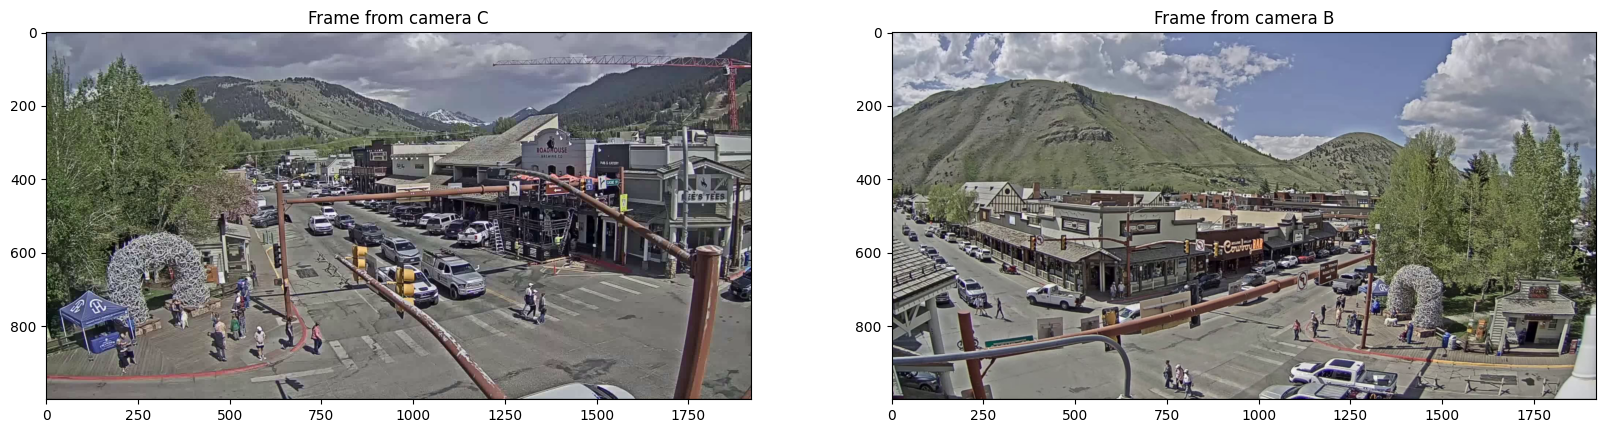

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].set_title("Frame from camera C")
axs[0].imshow(c)
axs[1].set_title("Frame from camera B")
axs[1].imshow(b)
plt.show()

In [7]:
cv.imwrite("correspondences/camera_c.png", cv.cvtColor(c, cv.COLOR_RGB2BGR))
cv.imwrite("correspondences/camera_b.png", cv.cvtColor(b, cv.COLOR_RGB2BGR))

True

In [8]:
coordinates_c = np.array(
    [
       [748, 877],
       [1343, 795],
       [1620, 779],
       [969, 811],
       [1327, 915],
       [803, 699],
       [696, 778],
       [742, 664],
       [1400, 784],
       [827, 868],
       [1409, 774],
       [1846, 787],
       [1837, 776],
       [218, 927],
       [560, 954],
       [686, 978],
    ]
)

coordinates_b = np.array(
    [
        [1094, 839],
        [761, 958],
        [469, 967],
        [1067, 901],
        [731, 864],
        [1435, 957],
        [1277, 874],
        [1602, 957],
        [699, 974],
        [1070, 855],
        [699, 988],
        [265, 923],
        [258, 935],
        [1211, 757],
        [1089, 796],
        [1019, 801],
    ]
)

F, mask = cv.findHomography(coordinates_c, coordinates_b)
print(F)
print(mask)
Finv, mask = cv.findHomography(coordinates_b, coordinates_c)
print(Finv)
print(mask)

[[     1.2631     -1.3538     -1503.1]
 [    0.20802     -2.0654      307.52]
 [ 0.00032342  -0.0032521           1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[    0.47153     -3.2003      1761.2]
 [   -0.02866    -0.65045      114.33]
 [-0.00011385  -0.0016827           1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


Text(0.5, 1.0, 'Camera B')

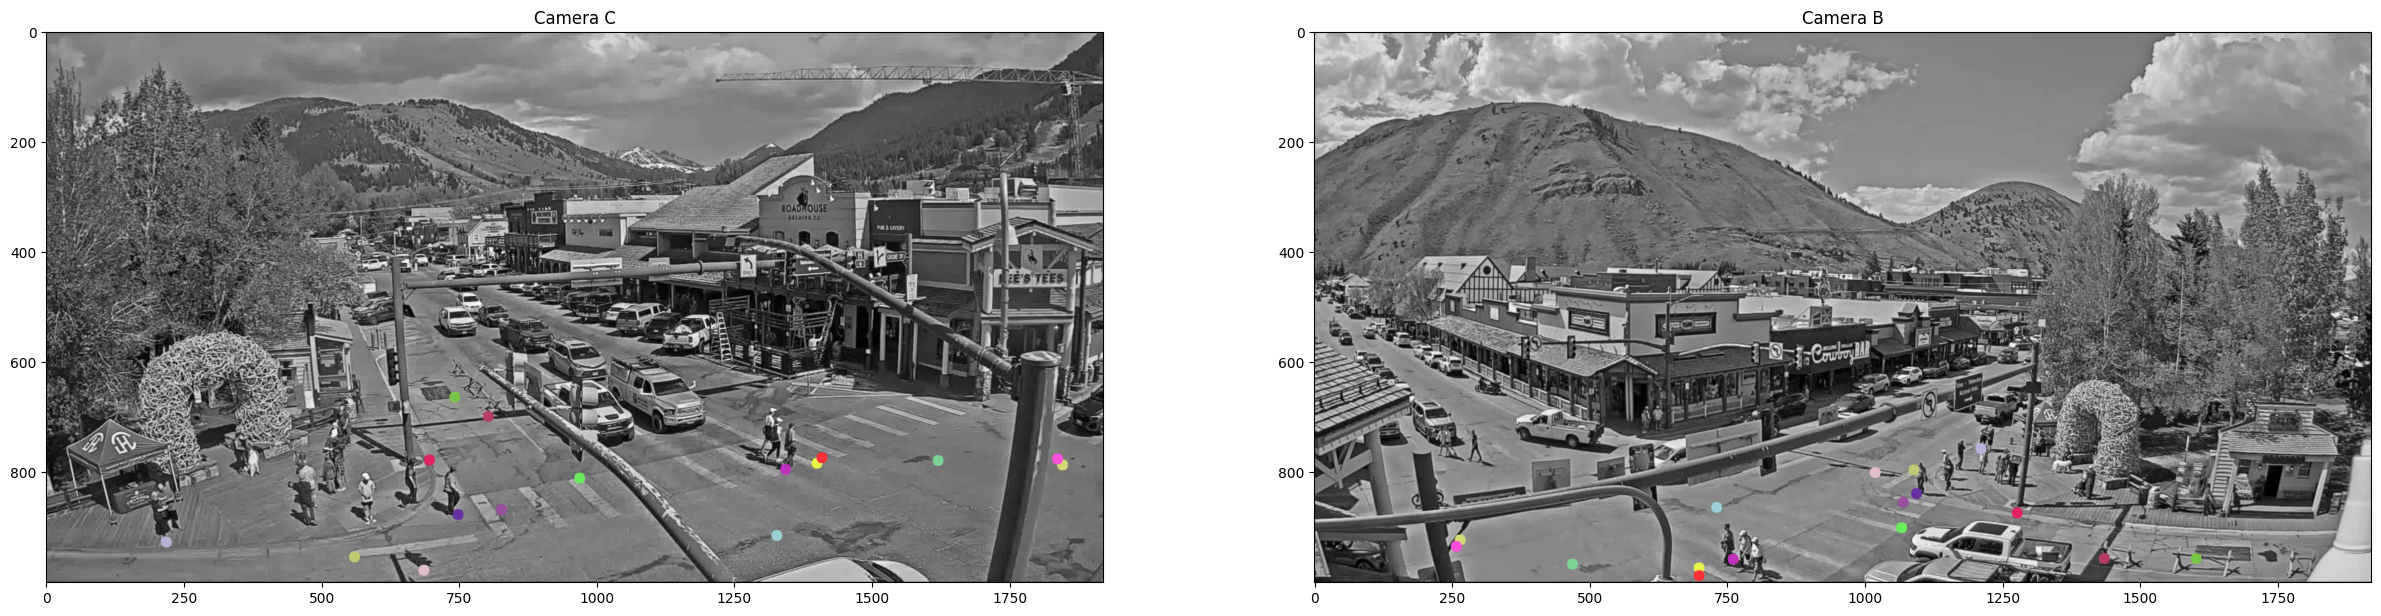

In [9]:
c_points = cv.cvtColor(cv.cvtColor(np.copy(c), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)
b_points = cv.cvtColor(cv.cvtColor(np.copy(b), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)

colors = [np.random.randint([100, 30, 50], [255, 255, 255]).tolist() for _ in range(len(coordinates_c))]
for i in range(len(coordinates_c)):
    cv.circle(c_points, tuple(coordinates_c[i]), 10, colors[i], -1)
    cv.circle(b_points, tuple(coordinates_b[i]), 10, colors[i], -1)

fig, ax = plt.subplots(1, 2, figsize=(30, 40))
ax[0].imshow(c_points)
ax[0].set_title("Camera C")
ax[1].imshow(b_points)
ax[1].set_title("Camera B")

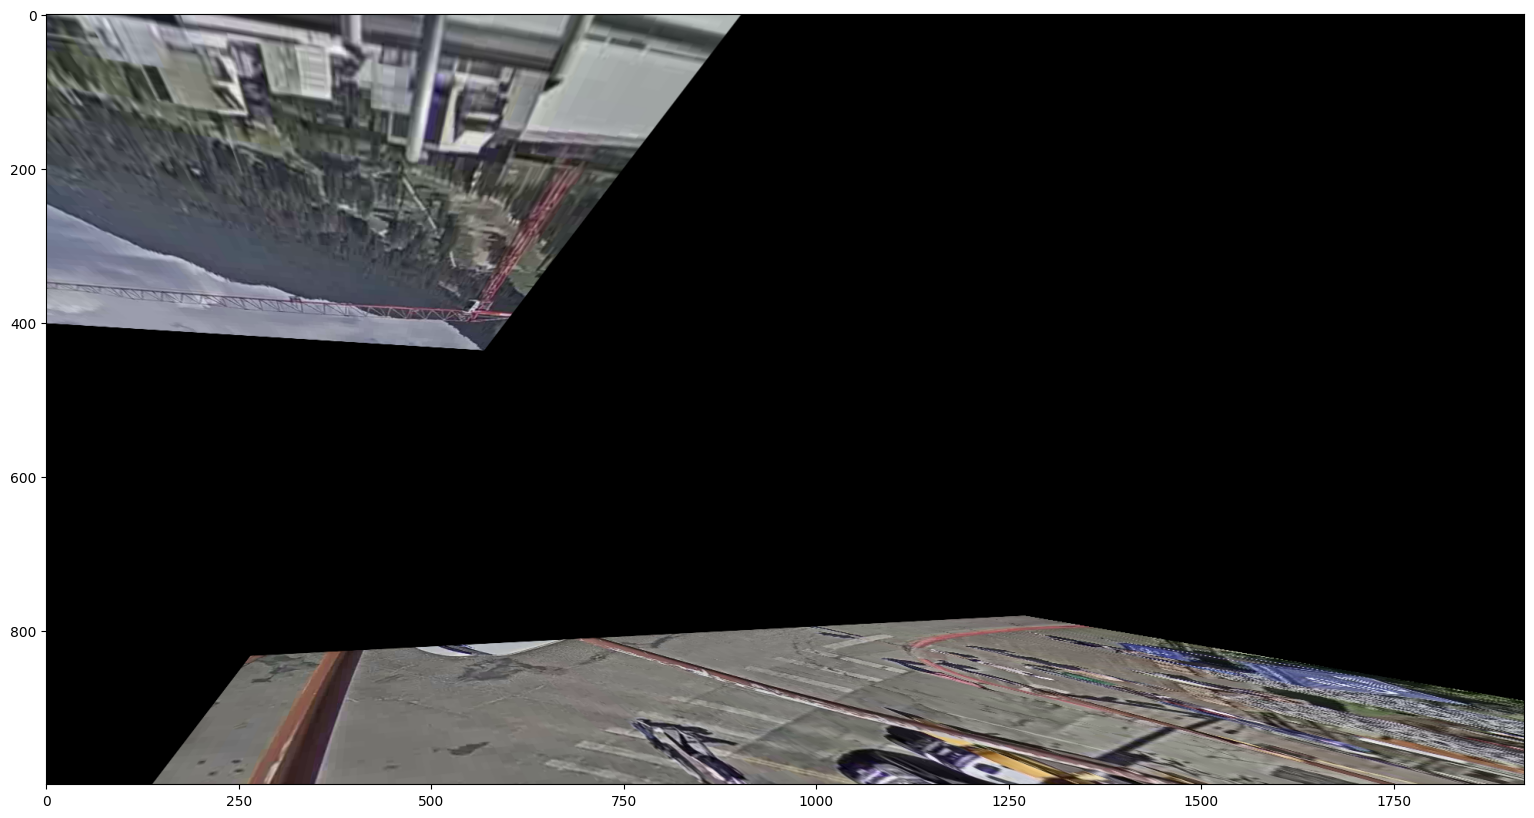

In [10]:
warped = cv.warpPerspective(c, F, (b.shape[1], b.shape[0]))

plt.figure(figsize=(20, 10))
plt.imshow(warped)

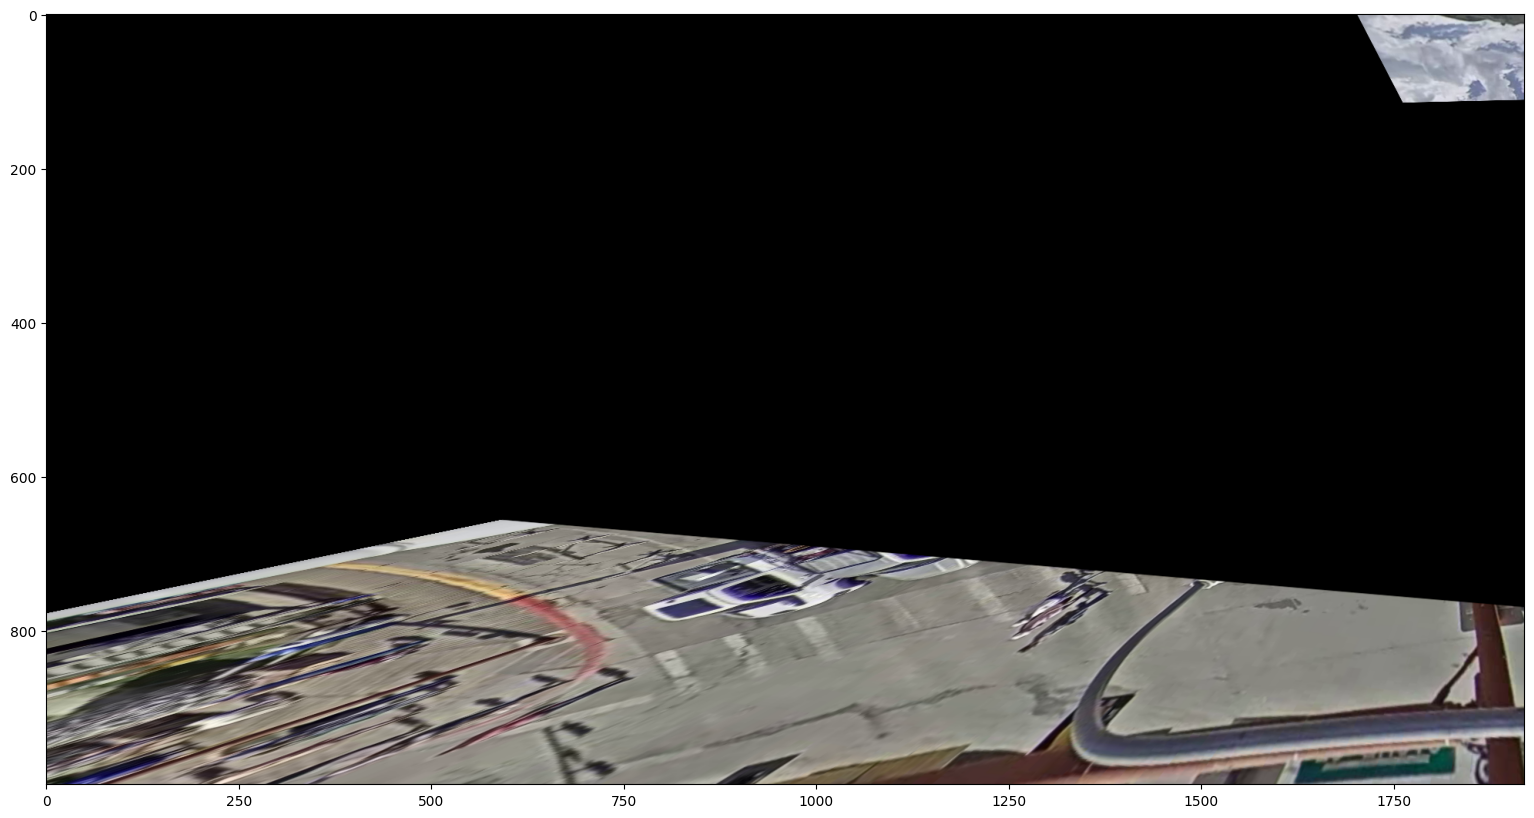

In [11]:
warped = cv.warpPerspective(b, Finv, (c.shape[1], c.shape[0]))

plt.figure(figsize=(20, 10))
plt.imshow(warped)

[[604 815]]


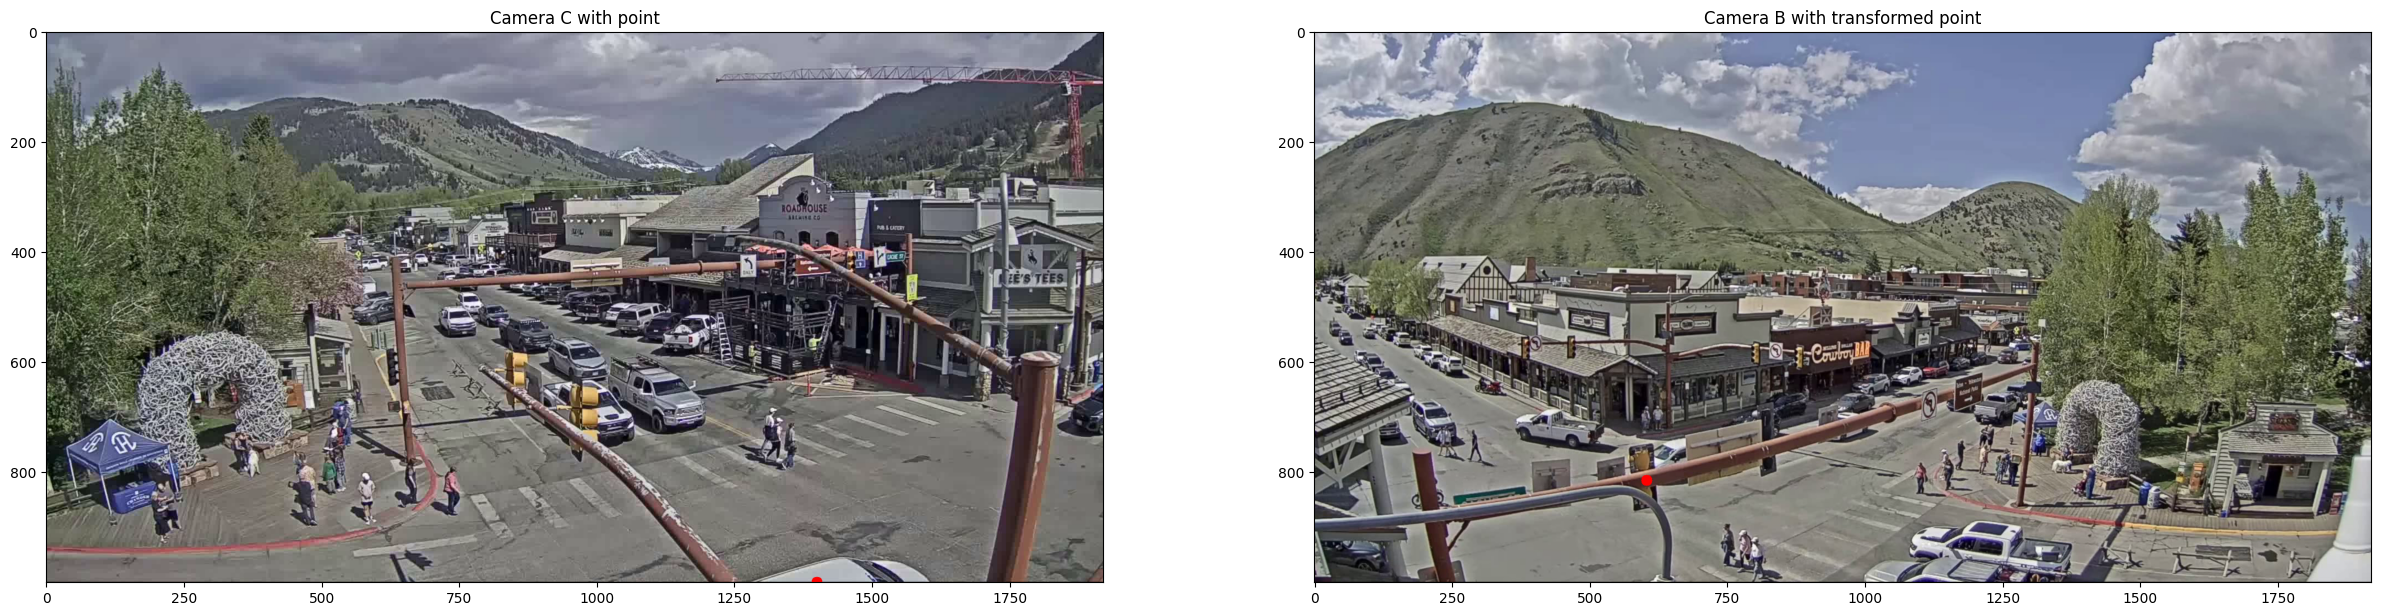

In [15]:
# Transform the points from camera A to camera B

points_to_transform = np.array([
    [1400, 1000],
])
transformed_points = cv.perspectiveTransform(points_to_transform.reshape(-1, 1, 2).astype(np.float32), F)[0].astype(int)
print(transformed_points)

c_copy = c.copy()
b_copy = b.copy()

cv.circle(c_copy, points_to_transform[0], 10, (255, 0, 0), -1)

# Draw the transformed points on the warped image
for i in range(len(transformed_points)):
    cv.circle(b_copy, transformed_points[i], 10, (255, 0, 0), -1)

fig, ax = plt.subplots(1, 2, figsize=(30, 40))
ax[0].imshow(c_copy)
ax[0].set_title("Camera C with point")
ax[1].imshow(b_copy)
ax[1].set_title("Camera B with transformed point")
plt.show()

In [16]:
np.save("homography_matrices/CB.npy", F)
np.save("homography_matrices/BC.npy", Finv)